In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
SO_survey_df = pd.read_csv('./SO_survey_data.csv')

In [3]:
SO_survey_df.shape

(73268, 37)

In [4]:
SO_survey_df.head()

,MainBranch,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,...,VersionControlSystem,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,Age,Gender,Ethnicity
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Git,NaN,NaN,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,...,Git,Microsoft Teams,Microsoft Teams,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,25-34 years old,Man,White
3,I am a developer by profession,Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",...,Git,Slack;Zoom,Slack;Zoom,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,A few times per week,35-44 years old,Man,White
4,I am a developer by profession,"Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,"Developer, front-end;Developer, full-stack;Dev...",...,Git;Other (please specify):,Microsoft Teams;Zoom,NaN,Collectives on Stack Overflow;Stack Overflow f...,Multiple times per day,Yes,Daily or almost daily,25-34 years old,NaN,NaN


In [184]:
def transform_data(nested_column, condition=False):
    data = []
    for column in nested_column:
        for value in column:
            if value == condition:
                continue
            data.append(value)
    
    return data

In [249]:
def show_chart(title):
    plt.title(title, fontsize=20)
    plt.show()

In [251]:
def horizontal_bar(column, title, slice_item=False):
    if slice_item:
        plt.figure(figsize=(10,7))
        column.value_counts()[:slice_item].plot(kind='barh', fontsize=15).invert_yaxis()
        plt.title(title, fontsize=20)
        plt.xticks([])

        plt.show()
    else:
        plt.figure(figsize=(10,7))
        column.value_counts().plot(kind='barh', fontsize=15).invert_yaxis()
        plt.title(title, fontsize=20)
        plt.xticks([])

        plt.show()

## Analysis and Visualization

## Gender Representation

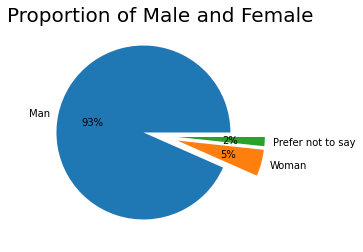

In [250]:
gender_filter = SO_survey_df[SO_survey_df.Gender.isin(['Man','Woman', 'Prefer not to say'])]

gender_filter.Gender.value_counts().plot(kind='pie', ylabel="", autopct='%1.0f%%',explode=(0.2,0.2,0.2))
show_chart('Gender Representation')

## Respondents Age Bracket

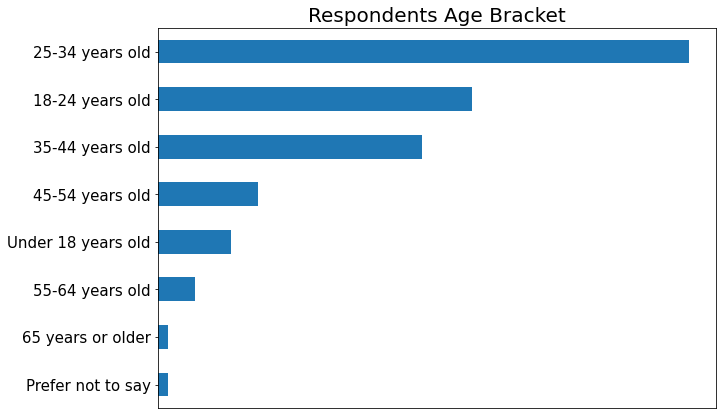

In [252]:
## Respondents Age Brackets
horizontal_bar(SO_survey_df.Age, 'Respondents Age Bracket')

## Top 10 Respondents Country

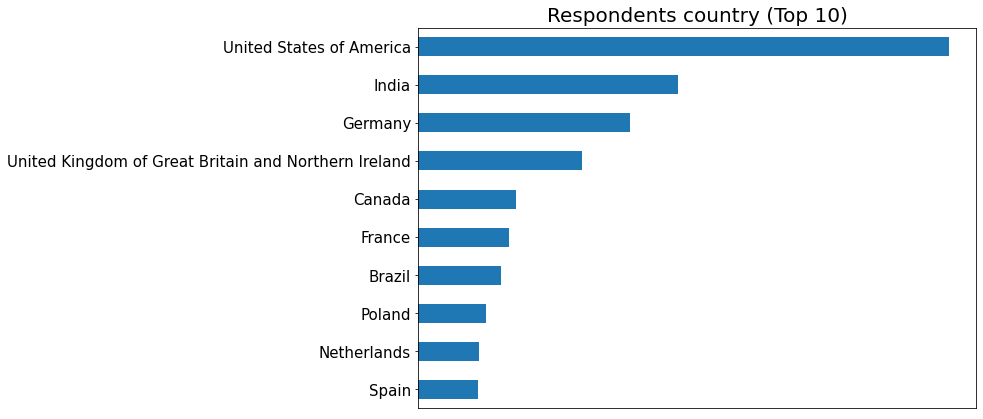

In [253]:
horizontal_bar(SO_survey_df.Country,'Respondents country (Top 10)', 10)

In [133]:
SO_survey_df[~SO_survey_df.YearsCode.isnull()].YearsCode.astype(int)

2        14
3        20
4         8
5        15
6         3
         ..
73263     8
73264     6
73265    42
73266    50
73267    16
Name: YearsCode, Length: 71331, dtype: int32

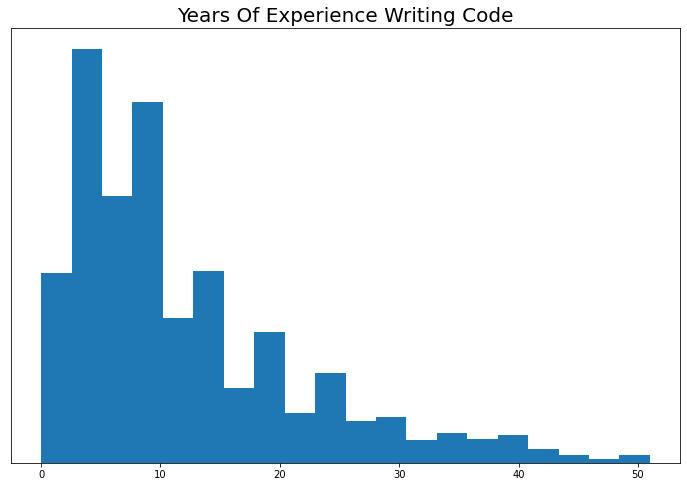

In [277]:
plt.figure(figsize=(12,8))

plt.hist(SO_survey_df.YearsCode, bins=20)
plt.yticks([])
show_chart('Years Of Experience Writing Code')

In [255]:
learn_code_online = SO_survey_df[~SO_survey_df.LearnCodeOnline.isnull()]['LearnCodeOnline'].replace(to_replace='\(.+\)', regex=True, value='').str.split(';')


In [256]:
learn_coding_online = transform_data(learn_code_online)

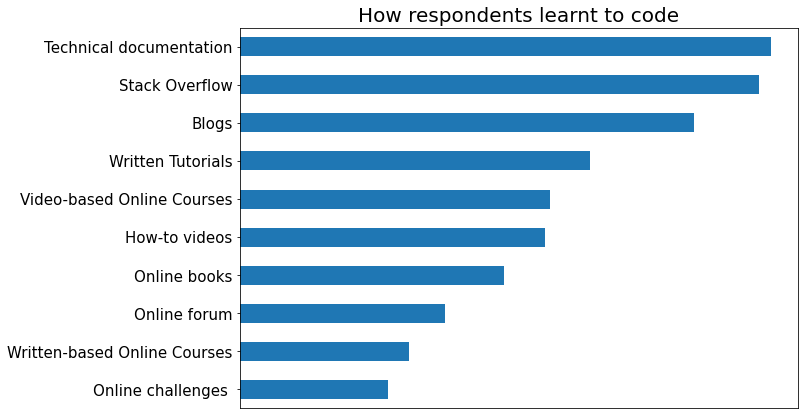

In [258]:
horizontal_bar(pd.Series(learn_coding_online),'How respondents learnt to code', 10)

In [183]:
SO_survey_df.DevType.value_counts()[:5]

Developer, full-stack                                             7142
Developer, back-end                                               5301
Developer, front-end                                              2385
Developer, front-end;Developer, full-stack;Developer, back-end    1807
Developer, full-stack;Developer, back-end                         1535
Name: DevType, dtype: int64

In [259]:
devtype_data = SO_survey_df[~SO_survey_df.DevType.isnull()].DevType.str.replace('Developer, ', '').value_counts()

devtype_Data = pd.Series(devtype_data).index.str.strip().str.split(';')

DevType = transform_data(devtype_Data, "Other (please specify):")

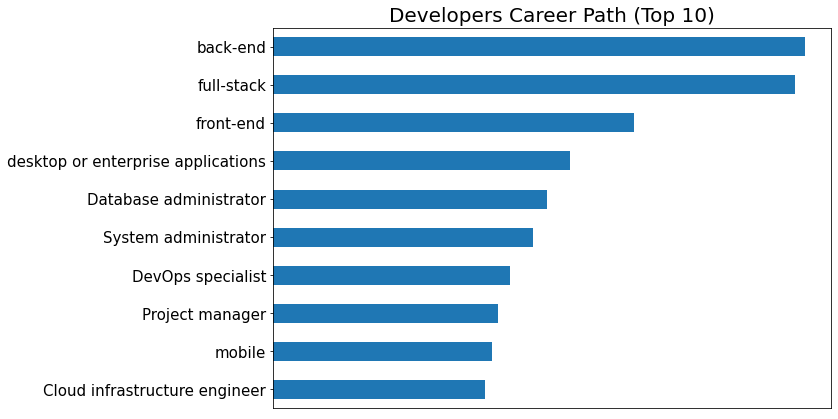

In [261]:
horizontal_bar(pd.Series(DevType),'Developers Career Path (Top 10)', 10)

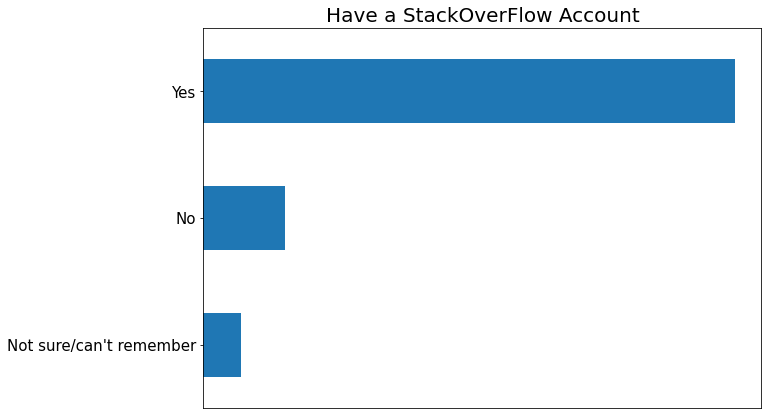

In [262]:

horizontal_bar(SO_survey_df.SOAccount,'Have a StackOverFlow Account', 10)

## Operating System personal use

In [202]:
OS_personal_use = SO_survey_df[~SO_survey_df['OpSysPersonal use'].isnull()]['OpSysPersonal use'].replace(to_replace='Other \(.+', regex=True, value='').str.split(';')

os_personal = transform_data(OS_personal_use, '')

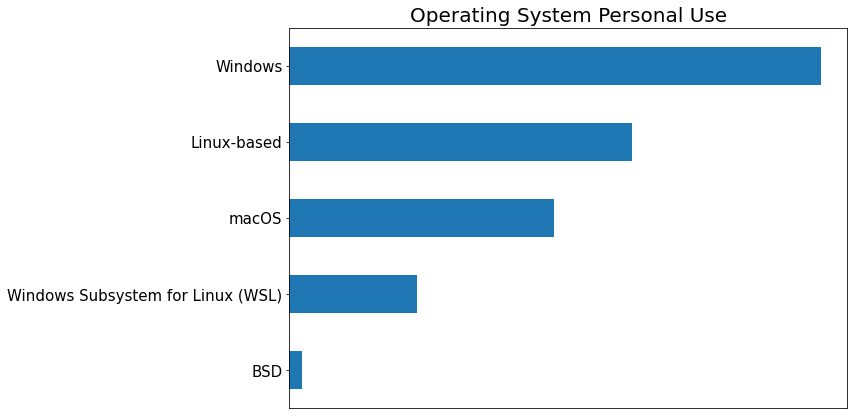

In [263]:
horizontal_bar(pd.Series(os_personal), 'Operating System Personal Use')

In [205]:

OS_Professional_use = SO_survey_df[~SO_survey_df['OpSysProfessional use'].isnull()]['OpSysProfessional use'].str.split(';')

os_professional_use = transform_data(OS_Professional_use,"Other (please specify):")

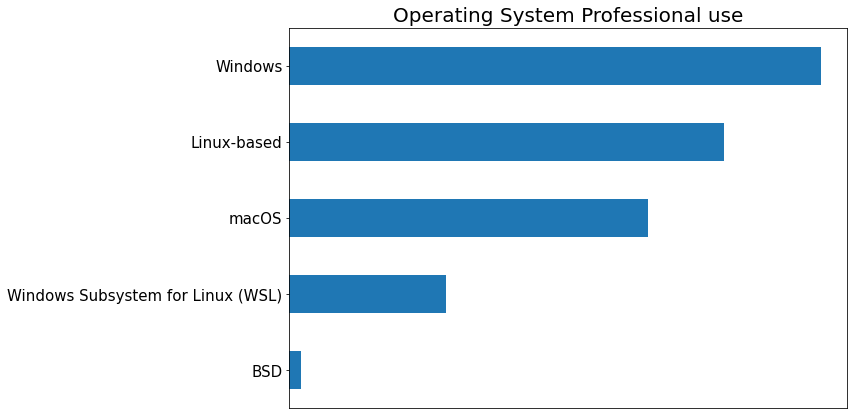

In [264]:
horizontal_bar(pd.Series(os_professional_use), 'Operating System Professional use')

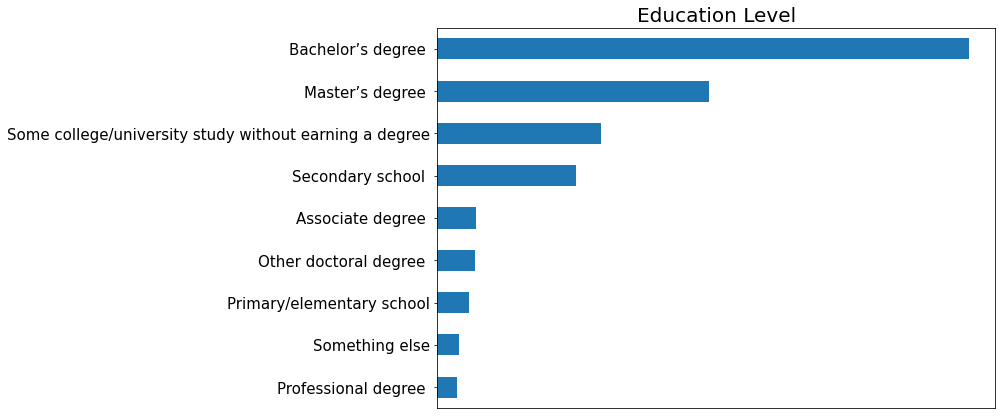

In [265]:
education_level = SO_survey_df[~SO_survey_df.EdLevel.isnull()].EdLevel.replace(to_replace='\(.+', regex=True, value='')

horizontal_bar(education_level, 'Education Level')

In [210]:
language_worked_with = SO_survey_df[~SO_survey_df.LanguageHaveWorkedWith.isnull()].LanguageHaveWorkedWith.str.split(';')

In [212]:
programming_language = transform_data(language_worked_with)

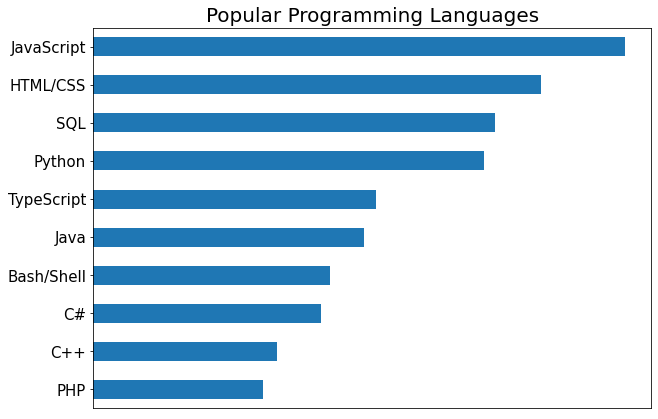

In [266]:
horizontal_bar(pd.Series(programming_language), 'Popular Programming Languages', 10 )

In [218]:

database_worked_with = SO_survey_df[~SO_survey_df.DatabaseHaveWorkedWith.isnull()].DatabaseHaveWorkedWith.str.split(';')

database = transform_data(database_worked_with)

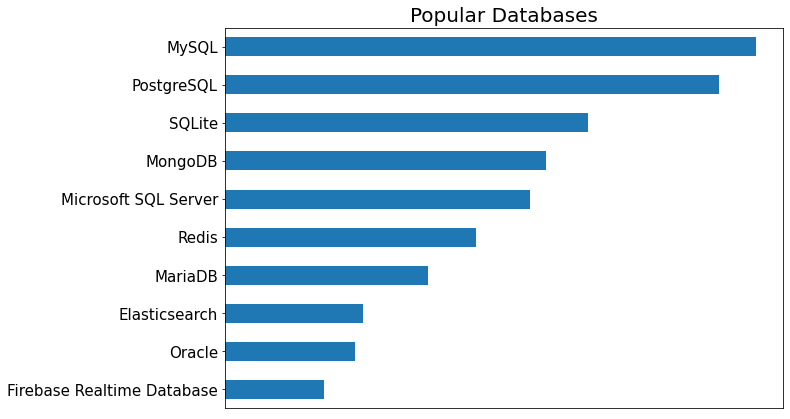

In [267]:
horizontal_bar(pd.Series(database), 'Popular Databases', 10)

In [224]:

coding_activities = SO_survey_df[~SO_survey_df.CodingActivities.isnull()].CodingActivities.replace(to_replace='Other \(.+', regex=True, value='').str.split(';')


In [232]:
coding_activity = transform_data(coding_activities,'')

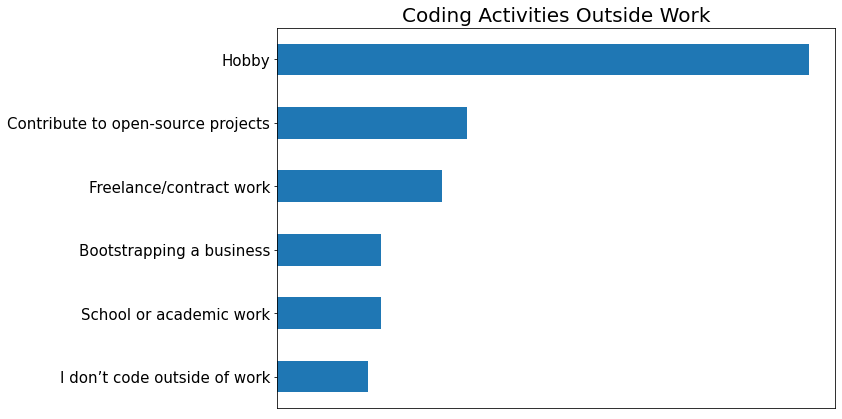

In [268]:
horizontal_bar(pd.Series(coding_activity), 'Coding Activities Outside Work')

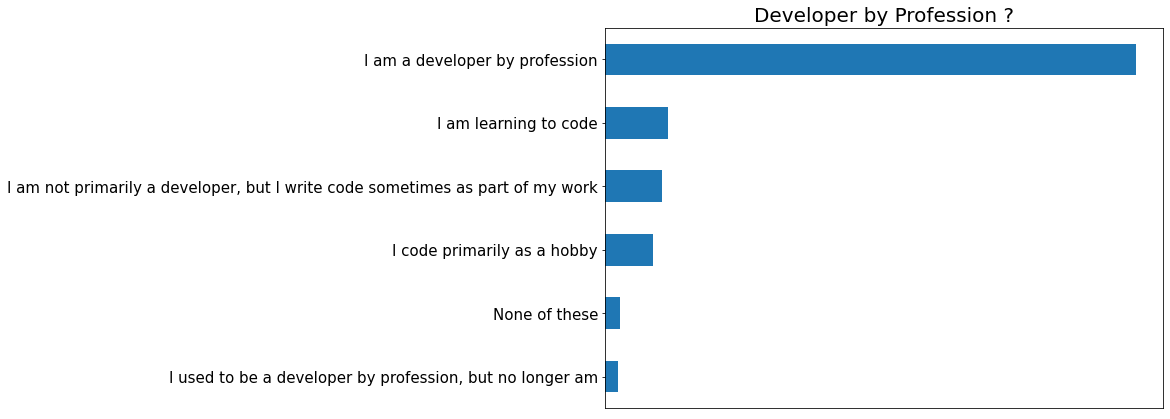

In [271]:
horizontal_bar(SO_survey_df.MainBranch, 'Developer by Profession ?')

In [238]:
learn_code_cert = SO_survey_df[~SO_survey_df.LearnCodeCoursesCert.isnull()].LearnCodeCoursesCert.str.split(';')

learnCodeCert = transform_data(learn_code_cert)

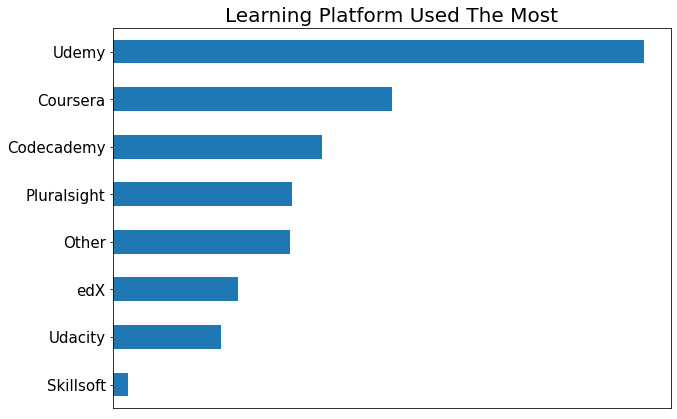

In [272]:
horizontal_bar(pd.Series(learnCodeCert), 'Learning Platform Used The Most')